DATA PREPROCESSING AND CLEANING

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv('healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [4]:
df.shape

(55500, 15)

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [6]:
df.duplicated().sum()

np.int64(534)

In [7]:
print({(df.duplicated().sum()/len(df))*100})

{np.float64(0.9621621621621621)}


In [8]:
exact_duplicates = df[df.duplicated(keep=False)].head(10)
print(exact_duplicates)

                Name  Age  Gender Blood Type Medical Condition  \
64      Nancy glOVeR   58    Male         A-      Hypertension   
107    DAVid higgInS   49  Female         B-         Arthritis   
148   RoBErt hIGGInS   42    Male        AB-            Asthma   
154      kevIn HiCKs   66    Male        AB+         Arthritis   
159   miCHAeL TayloR   29    Male         O-            Asthma   
246    wiLlIAm mcCOY   80    Male         A-            Asthma   
360    tHOMas DENnIs   40    Male         A+            Asthma   
408  MelIssA hOFfMAN   36    Male         B+            Cancer   
454      jOrdan LEON   51  Female         O+         Arthritis   
621   JesSIcA caRtER   51  Female         A-           Obesity   

    Date of Admission             Doctor                     Hospital  \
64         2020-05-08    Jennifer Larson  Khan, and Rodriguez Fischer   
107        2021-03-05  Erin Henderson MD    Evans and Hall Schneider,   
148        2021-05-06        Scott Davis      and Ford

In [9]:
key_fields = ['Name', 'Age', 'Gender', 'Medical Condition', 'Date of Admission']
duplicateskeys = df.duplicated(subset=key_fields).sum()
print(duplicateskeys)

534


In [10]:

df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [11]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [12]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [13]:
df['Name'] = df['Name'].str.strip().str.title()
df['Age'] = pd.to_numeric(df['Age'])
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Doctor']=df['Doctor'].str.strip().str.title()
df['Hospital']=df['Hospital'].str.strip().str.title()
df['Room Number'] = pd.to_numeric(df['Room Number'])
df['Billing Amount'] = pd.to_numeric(df['Billing Amount'].round(2))


In [14]:
df['Gender'] = df['Gender'].str.strip().str.title()
gender_mapping = {
    'Male': 'Male',
    'Female': 'Female',
    'M': 'Male',
    'F': 'Female',
    'MALE': 'Male',
    'FEMALE': 'Female',
}
df['Gender'] = df['Gender'].map(gender_mapping).fillna('Unknown')

FEATURE ENGINEERING

1. LENGTH OF STAY

In [15]:
df['length of stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

2. AGE CATEGORY

In [16]:
df['Age Category'] = pd.cut(df['Age'],
                          bins=[0,18,36,60,100],
                          labels=['child','teenager','adult','senior citizen'])

3. MONTH AND YEAR OF ADMISSION

In [17]:
df['Year of admission'] = df['Date of Admission'].dt.year
df['Month of admission'] = df['Date of Admission'].dt.month_name()

In [24]:
df.to_csv("Healthcare_cleaned_data.csv")

DATA VIZUALIZATION

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

1. AGE DISTRIBUTION

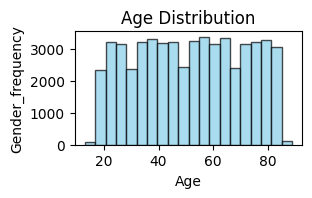

In [19]:
Gender_frequency = df['Gender'].value_counts()
plt.figure(figsize=(10, 5)),
plt.subplot(3, 3, 1),
plt.hist(df['Age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black'),
plt.title('Age Distribution'),
plt.xlabel('Age'),
plt.ylabel('Gender_frequency'),
plt.show()


2. GENDER DISTRIBUTION

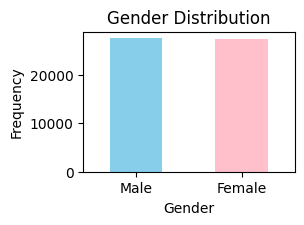

In [20]:


# Count the frequency of each gender
gender_counts = df['Gender'].value_counts()

# Create a bar chart
plt.figure(figsize=(6,4))
plt.subplot(2, 2, 1)
gender_counts.plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

3. TEST RESULTS

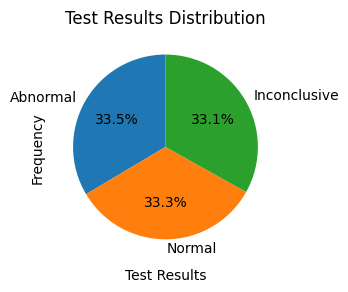

In [21]:
test_counts = df['Test Results'].value_counts()
plt.figure(figsize=(3, 3))
test_counts.plot(kind='pie', autopct='%.1f%%', startangle=90)
plt.title('Test Results Distribution')
plt.xlabel('Test Results')
plt.ylabel('Frequency')
plt.show()


4. AGE CATEGORY COUNTS

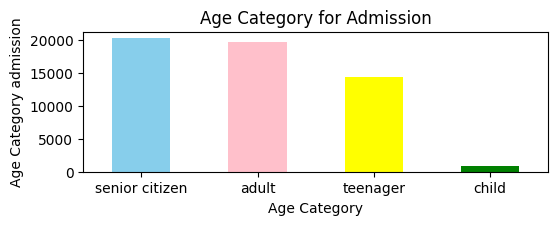

In [22]:
Age_cat_counts = df['Age Category'].value_counts()
plt.figure(figsize=(6,4))
plt.subplot(2, 1, 2)
Age_cat_counts.plot(kind='bar', color=['skyblue', 'pink','yellow', 'green'])
plt.title('Age Category for Admission')
plt.xlabel('Age Category')
plt.ylabel('Age Category admission')
plt.xticks(rotation=0)
plt.show()

In [27]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,length of stay,Age Category,Year of admission,Month of admission
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal,2,teenager,2024,January
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6,senior citizen,2019,August
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal,15,senior citizen,2022,September
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal,30,teenager,2020,November
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal,20,adult,2022,September


MACHINE LEARNING MODEL

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [28]:
features = ['Age','Gender','Blood Type','Medical Condition','Admission Type','Test Results', 'length of stay']
target = 'Medication'

In [29]:
df_encoded = pd.get_dummies(df[features], columns=['Age','Gender','Blood Type','Medical Condition','Admission Type','Test Results', 'length of stay'])

In [30]:
le = LabelEncoder()
y = le.fit_transform(df[target])
X = df_encoded

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, classification_report

In [39]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report with original labels (more readable)
print("\nClassification Report:")
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred)))

# Optional: Add target names for even better readability
print("\nDetailed Classification Report:")
target_names = le.classes_  # Gets original class names
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.24

Classification Report:
              precision    recall  f1-score   support

     Aspirin       0.24      0.24      0.24      2221
   Ibuprofen       0.24      0.25      0.24      2184
     Lipitor       0.24      0.25      0.24      2193
 Paracetamol       0.23      0.23      0.23      2179
  Penicillin       0.24      0.23      0.23      2217

    accuracy                           0.24     10994
   macro avg       0.24      0.24      0.24     10994
weighted avg       0.24      0.24      0.24     10994


Detailed Classification Report:
              precision    recall  f1-score   support

     Aspirin       0.24      0.24      0.24      2221
   Ibuprofen       0.24      0.25      0.24      2184
     Lipitor       0.24      0.25      0.24      2193
 Paracetamol       0.23      0.23      0.23      2179
  Penicillin       0.24      0.23      0.23      2217

    accuracy                           0.24     10994
   macro avg       0.24      0.24      0.24     10994
weigh

VISUALIZATION OF MEDICATION

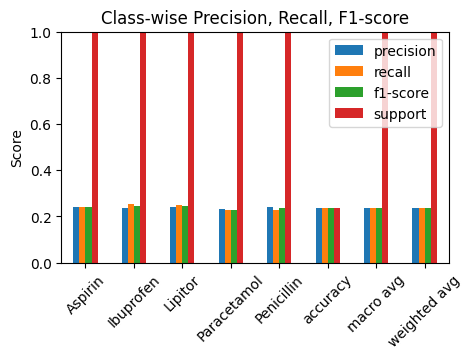

In [44]:
metrics = pd.DataFrame(classification_report(y_test, y_pred, target_names=target_names, output_dict=True)).transpose()
metrics.plot(kind='bar', figsize=(5,3))
plt.title('Class-wise Precision, Recall, F1-score')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

PREDICTING MEDICATION TO A NEW PATIENT

In [45]:
new_patient = pd.DataFrame({
    'Age': [40],
    'Gender': ['Male'],
    'Blood Type': ['A+'],
    'Medical Condition': ['Diabetes'],
    'Admission Type': ['Urgent'],
    'Test Results': ['Normal'],
    'length of stay': [5]
})
new_patient_encoded = pd.get_dummies(new_patient).reindex(columns=X.columns, fill_value=0)
prediction = model.predict(new_patient_encoded)
print(f"\nPredicted Medication: {le.inverse_transform(prediction)[0]}")


Predicted Medication: Aspirin
